# Loan Prediction - Exploratory Data Analysis

In [79]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


### Importing and pre-visualization

In [51]:
df_import = pd.read_csv('dataset/train_loan.csv')
display(df_import.head(10))
print(df_import.shape)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


(614, 13)


In [52]:
df_import.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Checking valid values

In [50]:
df_import.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

### For now, let's remove all NaN values from the training data

In [55]:
df_import_no_nan = df_import.copy().dropna()
df_import_no_nan.count()

Loan_ID              480
Gender               480
Married              480
Dependents           480
Education            480
Self_Employed        480
ApplicantIncome      480
CoapplicantIncome    480
LoanAmount           480
Loan_Amount_Term     480
Credit_History       480
Property_Area        480
Loan_Status          480
dtype: int64

### Visualizing cathegorical data distribution

In [145]:
def show_column_options(df):
    cols = df.columns
    for col in cols:
        print(col,f': {df[col].unique()}')

def plot_value_counts(df,title):
    plt.figure(figsize=(18, 12))
    plt.suptitle(title,fontsize = 20)
    for index,col in enumerate(df.columns):
        uniques = df[col].value_counts().keys().to_list()
        unique_counts =  df[col].value_counts().to_list()

        position = 240 + (index+1)
        plt.subplot(position)
        plt.bar(uniques,unique_counts)
        plt.title(col)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    plt.show()


In [126]:
cathegorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status']
show_column_options(df_import[cathegorical_columns])

Gender : ['Male' 'Female' nan]
Married : ['No' 'Yes' nan]
Dependents : ['0' '1' '2' '3+' nan]
Education : ['Graduate' 'Not Graduate']
Self_Employed : ['No' 'Yes' nan]
Property_Area : ['Urban' 'Rural' 'Semiurban']
Credit_History : [ 1.  0. nan]
Loan_Status : ['Y' 'N']


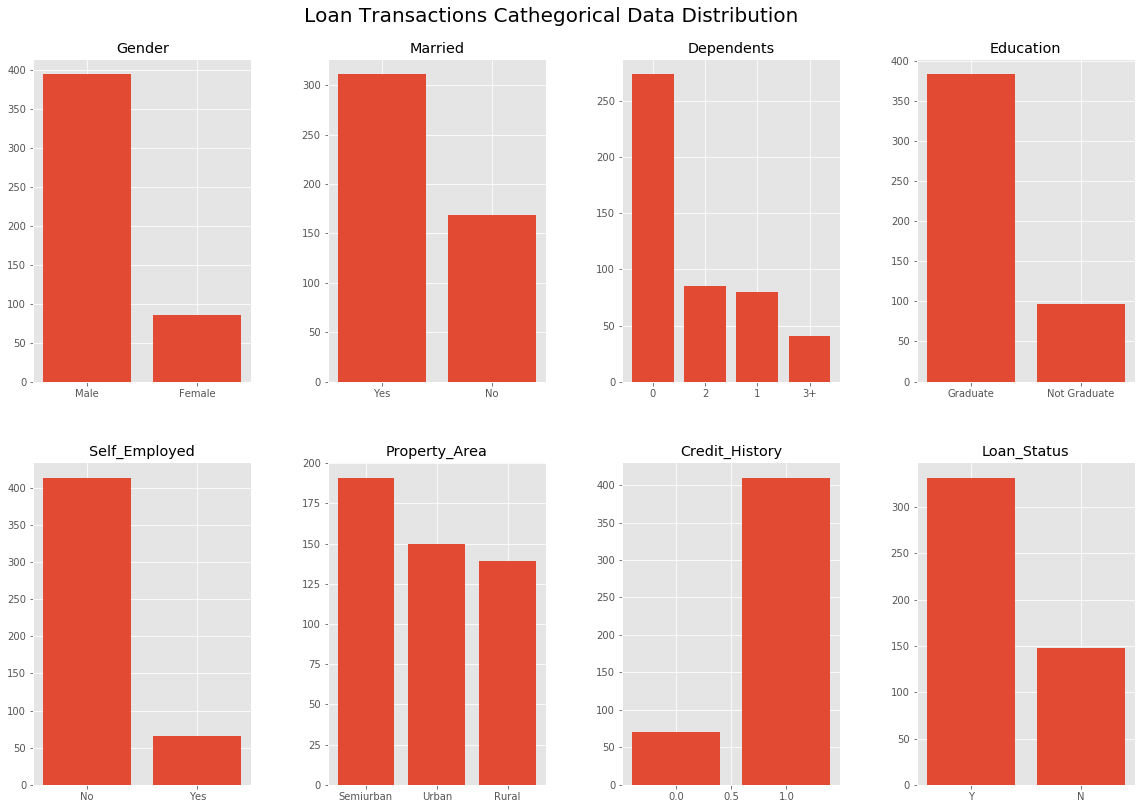

In [159]:
plot_value_counts(df_import_no_nan[cathegorical_columns],'Loan Transactions Cathegorical Data Distribution')

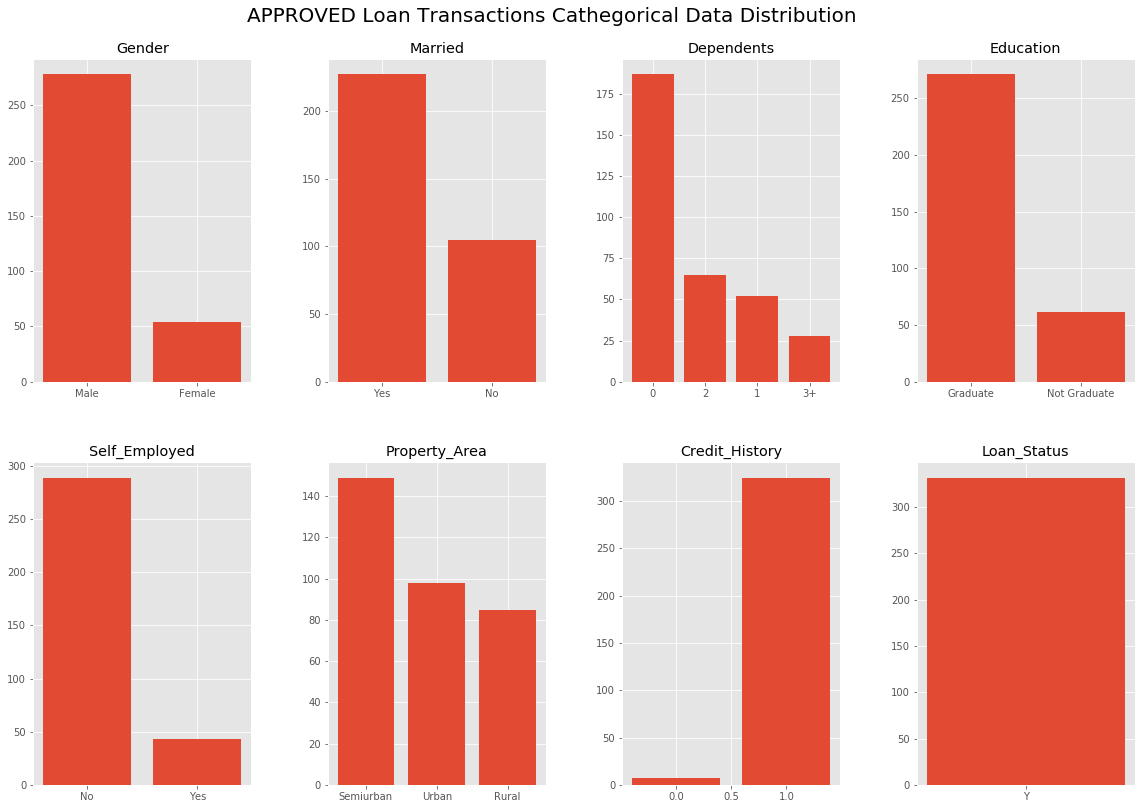

In [160]:
df_import_approved = df_import_no_nan.copy()[df_import_no_nan['Loan_Status'] == 'Y']
plot_value_counts(df_import_approved[cathegorical_columns],'APPROVED Loan Transactions Cathegorical Data Distribution')


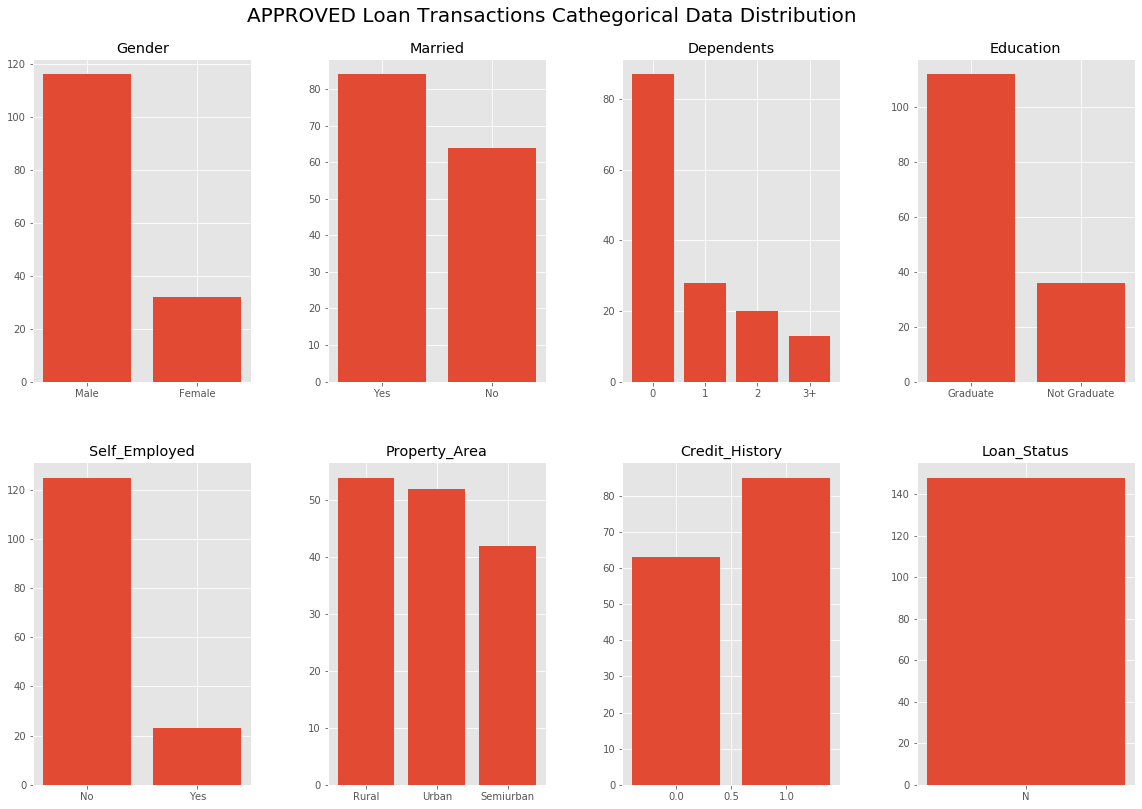

In [161]:
df_import_not_approved = df_import_no_nan.copy()[df_import_no_nan['Loan_Status'] == 'N']
plot_value_counts(df_import_not_approved[cathegorical_columns],'APPROVED Loan Transactions Cathegorical Data Distribution')


In most of the cathegorical variables, there are not great changes in proportions among values,for example, the proportion of Male/Female appears to be similar in both approved and not approved loan transactions.

Data shows that the only variable that appears to shift proportions drastically is the Credit_History. Although it makes sense that clients with credit history not following the bank guidelines are more prone to not receiving a loan, this is not a mandatory condition.

In [ ]:
def plot_numerical_distributions(df,title):
    plt.figure(figsize=(18, 12))
    plt.suptitle(title,fontsize = 20)
    for index,col in enumerate(df.columns):
        uniques = df[col].value_counts().keys().to_list()
        unique_counts =  df[col].value_counts().to_list()

        position = 220 + (index+1)
        plt.subplot(position)
        plt. (uniques,unique_counts)
        plt.title(col)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
    plt.show()

In [60]:
numeric_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [147]:
def encode_yes_no(df):
    for col in df.columns:
        df[df[col] == 'Yes' | df[col] == 'Y'][col] = 1
        df[df[col] == 'No' | df[col] == 'N'][col] = 0


